In [1]:
#Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()

Saving cleaned_star_data.csv to cleaned_star_data.csv


In [3]:
#Reading the csv file
main_df = pd.read_csv("cleaned_star_data.csv")

In [4]:
main_df.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


In [5]:
#Displaying sample values from the data set
main_df.sample(3)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
65,3295,0.00098,0.1320,17.13,0,Red,M
120,3323,0.00043,0.0912,17.16,0,Red,M
119,3780,200000.00000,1324.0000,-10.70,5,Red,M


In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [7]:
#Creating a directory to save the visualisations
foldername = 'starviz'
os.makedirs(foldername,exist_ok=True)
base_dir = f'/content/{foldername}/'
#under the content folder - check the copy path and then use f strings

Visualization to count the different types of star
Star Types
0 -> Brown Dwarf
1 -> Red Dwarf
2 -> White Dwarf
3 -> Main Sequence
4 -> Supergiants
5 -> Hypergiants

Using Matplotlib

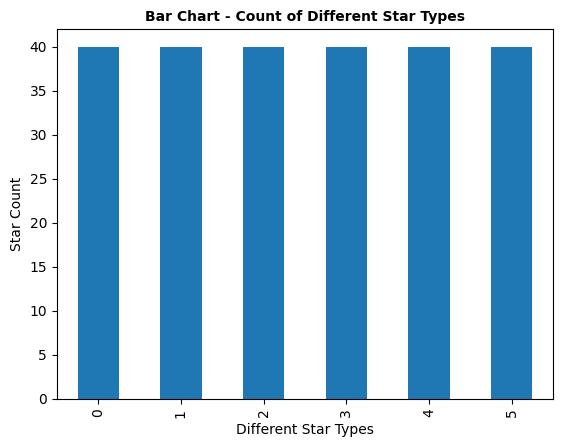

In [8]:
#Bar chart to visualize the count of the respective types
#df[colname].value_counts() will the count number of records
main_df['Star type'].value_counts().plot(kind='bar')
plt.ylabel('Star Count', color='black',fontsize=10)
plt.xlabel('Different Star Types', color='black',fontsize=10)
plt.style.use('default')
plt.title("Bar Chart - Count of Different Star Types", fontsize = 12, font = 'sans serif', color = 'black', weight = 'bold')
plt.show()

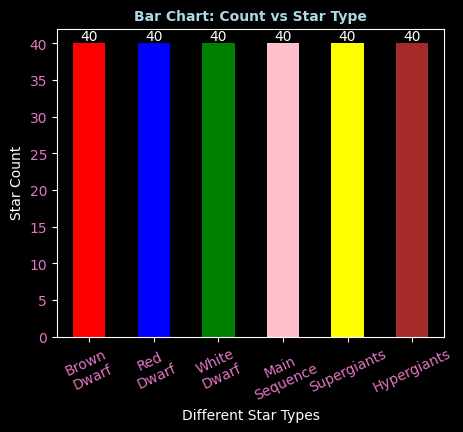

In [23]:
#Customization of the basic bar chart

#Changing the figsize
plt.figure(figsize = (5,4))
#change the background of chart to dark. use default for the default settings
plt.style.use('dark_background')
axis = main_df['Star type'].value_counts().plot(kind='bar', color = ['red','blue','green','pink','yellow','brown'])
axis.bar_label(axis.containers[0], color = 'white')
plt.title('Bar Chart: Count vs Star Type', color = 'lightblue',font ='sans serif', weight='bold')
plt.ylabel('Star Count', color='white',fontsize=10)
plt.xlabel('Different Star Types', color='white',fontsize=10)
plt.yticks(color = 'tab:pink')
plt.xticks(color = 'tab:pink',
           ticks=[0,1,2,3,4,5],
           labels=['Brown\nDwarf','Red\nDwarf','White\nDwarf','Main\nSequence','Supergiants','Hypergiants'],
           rotation=25)
#base_dir path + name of the figure to be saved
plt.savefig(base_dir + 'barplot_starcount_vs_type.jpg')
plt.show()

Using Seaborn

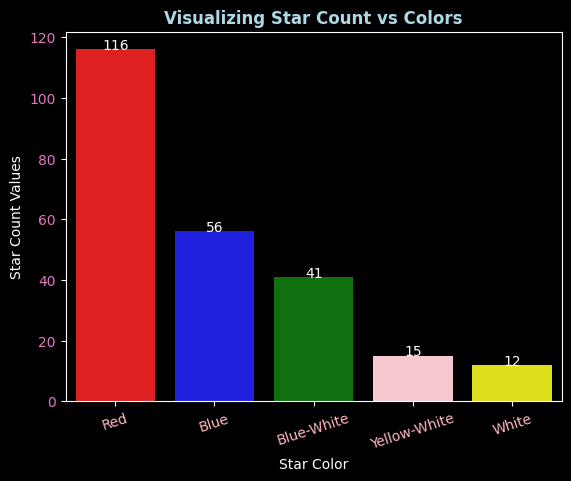

In [10]:
#Using Seaborn to visualize star data

#Function to add bar label values in the plot
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

#reason for this hue was suggested to be given the x axis value
hueval = main_df['Star color'].value_counts().index

#Visualizing the star color data using seaborn and matplotlib
palette = ['red','blue','green','pink','yellow']
ax = sns.barplot(x= main_df['Star color'].value_counts().index,
            y= main_df['Star color'].value_counts(),
            palette = palette, hue = hueval
            )

plt.style.use('dark_background')
addlabels(main_df['Star color'].value_counts().index, main_df['Star color'].value_counts())
plt.xticks(rotation=18, color='lightpink')
plt.yticks(color = 'tab:pink')
plt.ylabel('Star Count Values',color = 'white', fontsize=10)
plt.xlabel('Star Color', color = 'white', fontsize=10)
plt.title('Visualizing Star Count vs Colors', color = 'lightblue', font = 'sans serif' ,fontsize = 12, weight = 'bold')
plt.savefig(base_dir + 'barplot_starcount_vs_colors.jpg')
plt.show()

Plotting the outliers

In [11]:
main_df.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


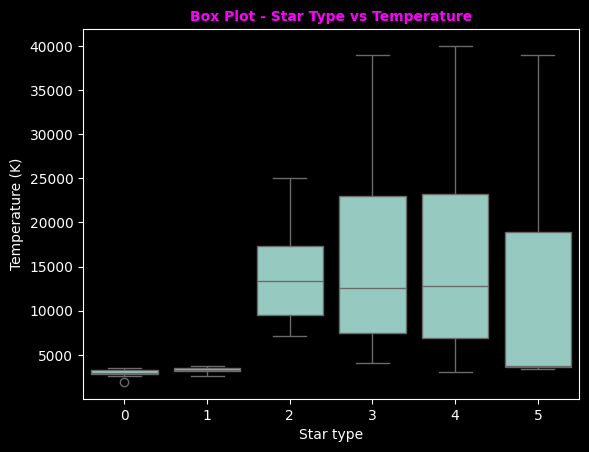

In [12]:
#Visualizing outliers using sns
plt.title("Box Plot - Star Type vs Temperature", fontsize = 12, font = 'sans serif', weight = 'bold', color = 'magenta' )
sns.boxplot( x = main_df['Star type'],
            y = main_df.iloc[:, 0]
)
plt.savefig(base_dir + 'boxplot_startype_vs_temp.jpg')
plt.show()


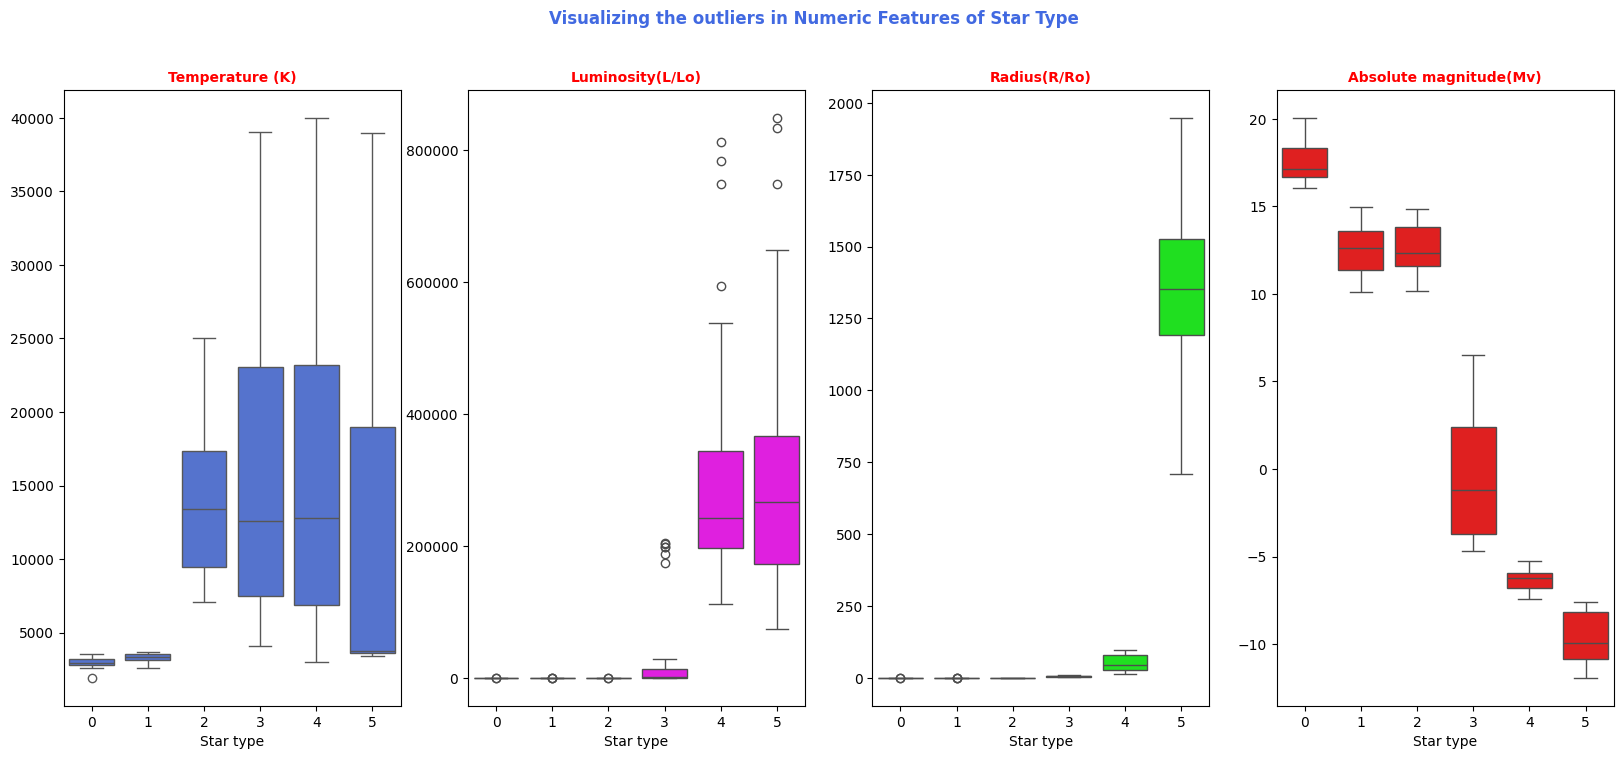

In [13]:
#Plotting the first 4 columns as subplots and displaying the different graphs in one plot itself
#subplots always start from pos 1
#to create the subplots creating a for loop
plt.style.use('default')
plt.figure(figsize = (20,8))
plt.suptitle('Visualizing the outliers in Numeric Features of Star Type', font = 'sans serif', weight = 'bold', fontsize = 12, color = 'royalblue')
colors = ['royalblue','magenta','lime','red','green']

#range is 4 because we are creating the plots on first 4 columns
for i in range (4):
  plt.subplot(1, 4, i+1)
  sns.boxplot( x = main_df['Star type'], y = main_df.iloc[:, i], color = colors[i])
  plt.title(main_df.columns[i], color= 'red', fontsize = 10, font = 'sans serif', weight = 'bold')
  plt.ylabel('')

plt.savefig(base_dir + 'boxplot_startype.jpg')
plt.show()

Line Plots

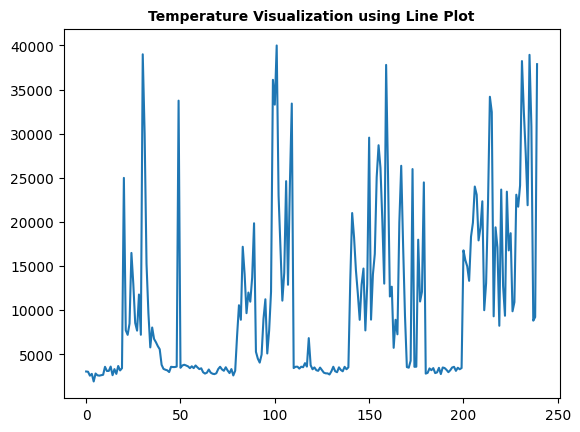

In [14]:
#Line plots
plt.plot(main_df.iloc[:,0])
plt.title("Temperature Visualization using Line Plot",fontsize = 12, font = 'sans serif', weight = 'bold', color = 'black')
plt.show()

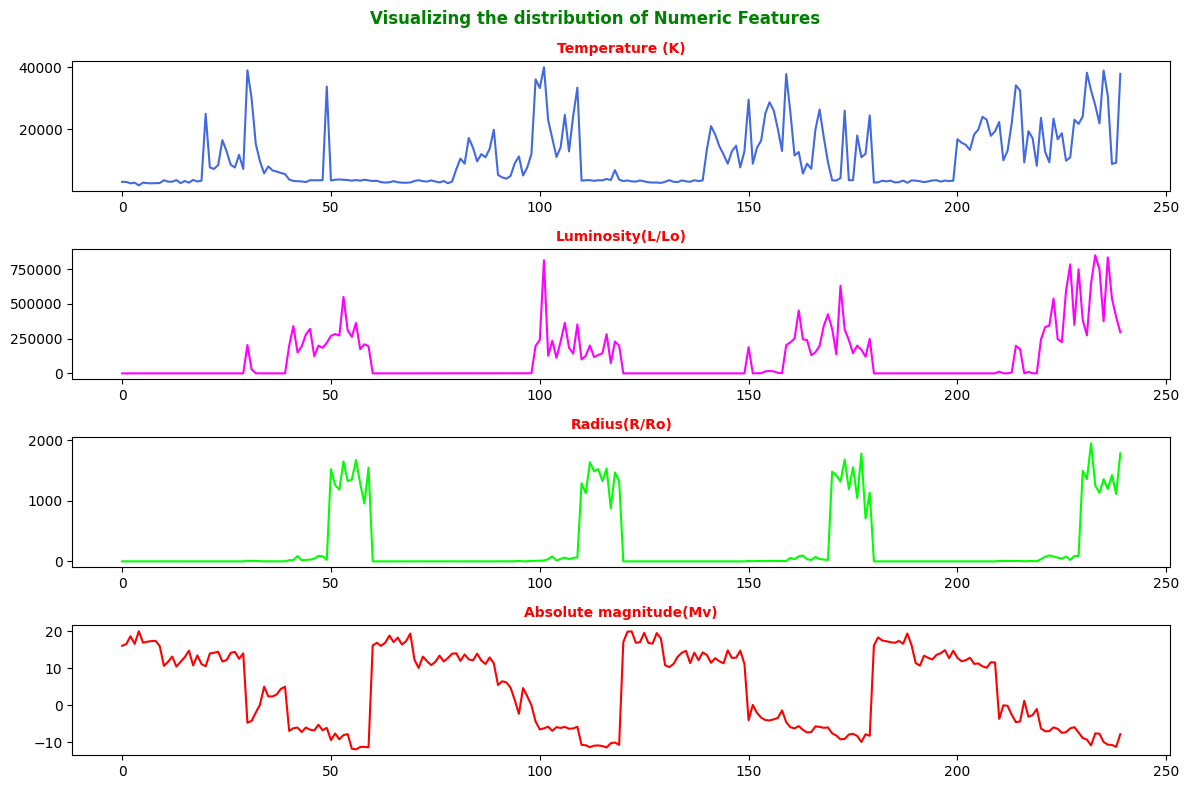

In [15]:
#Line plots
#4 rows and 1 column taken for the subplots - the 4 column data taken from the star data but for the plots - it is 4 rows and 1 column
plt.figure(figsize = (12,8))
colors = ['royalblue','magenta','lime','red','green']
plt.suptitle('Visualizing the distribution of Numeric Features', color = 'green', font = 'sans serif', fontsize = 12, weight = 'bold')

for i in range(4):
  plt.subplot(4,1,i+1)
  plt.plot(main_df.iloc[:,i], color = colors[i])
  plt.title(main_df.columns[i], color = 'red', font  = 'sans serif', fontsize = 10, weight = 'bold')
  plt.xlabel('')

plt.tight_layout()
plt.show()

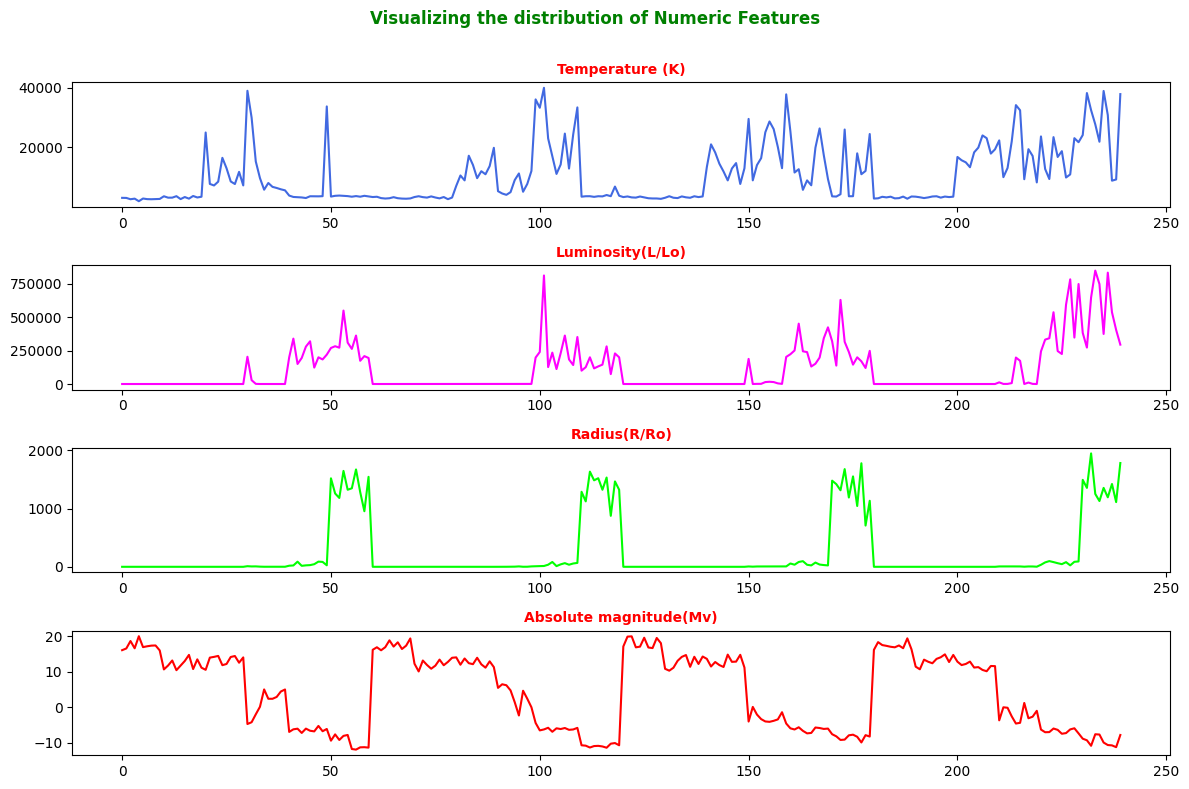

In [16]:
#Converting above code into a function
def line_subplotfn(main_df, colors, i):
  plt.subplot(4,1,i+1)
  plt.plot(main_df.iloc[:,i], color = colors[i])
  plt.title(main_df.columns[i], color = 'red', font  = 'sans serif', fontsize = 10, weight = 'bold')
  plt.xlabel('')

plt.figure(figsize = (12,8))
colors = ['royalblue','magenta','lime','red','green']
plt.suptitle('Visualizing the distribution of Numeric Features\n', color = 'green', font = 'sans serif', fontsize = 12, weight = 'bold')
for i in range(4):
  line_subplotfn(main_df, colors, i)
plt.tight_layout()
plt.savefig(base_dir + 'line_subplot_1.jpg')
plt.show()

Pair Plots

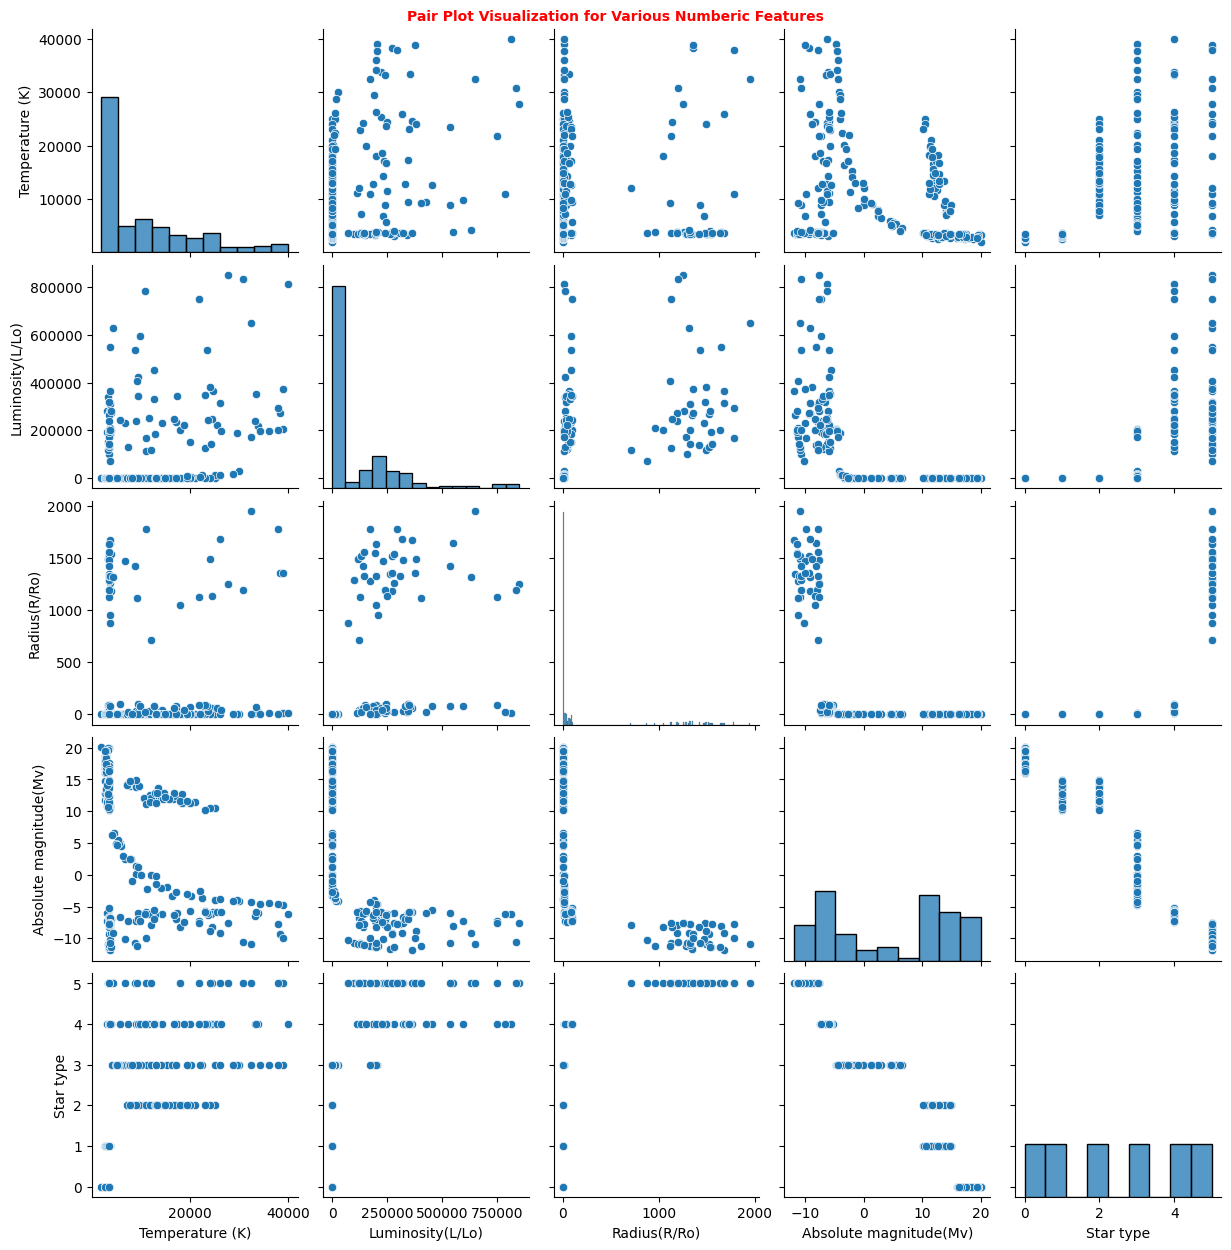

In [17]:
#By default - Pair plot - scatter
#eg temp col - comparing the data with data in other col like luminosity, radius etc
sns.pairplot(main_df)
plt.suptitle("Pair Plot Visualization for Various Numberic Features", color = 'red', font = 'sans serif', fontsize = 10, weight = 'bold', y=1)
plt.show()

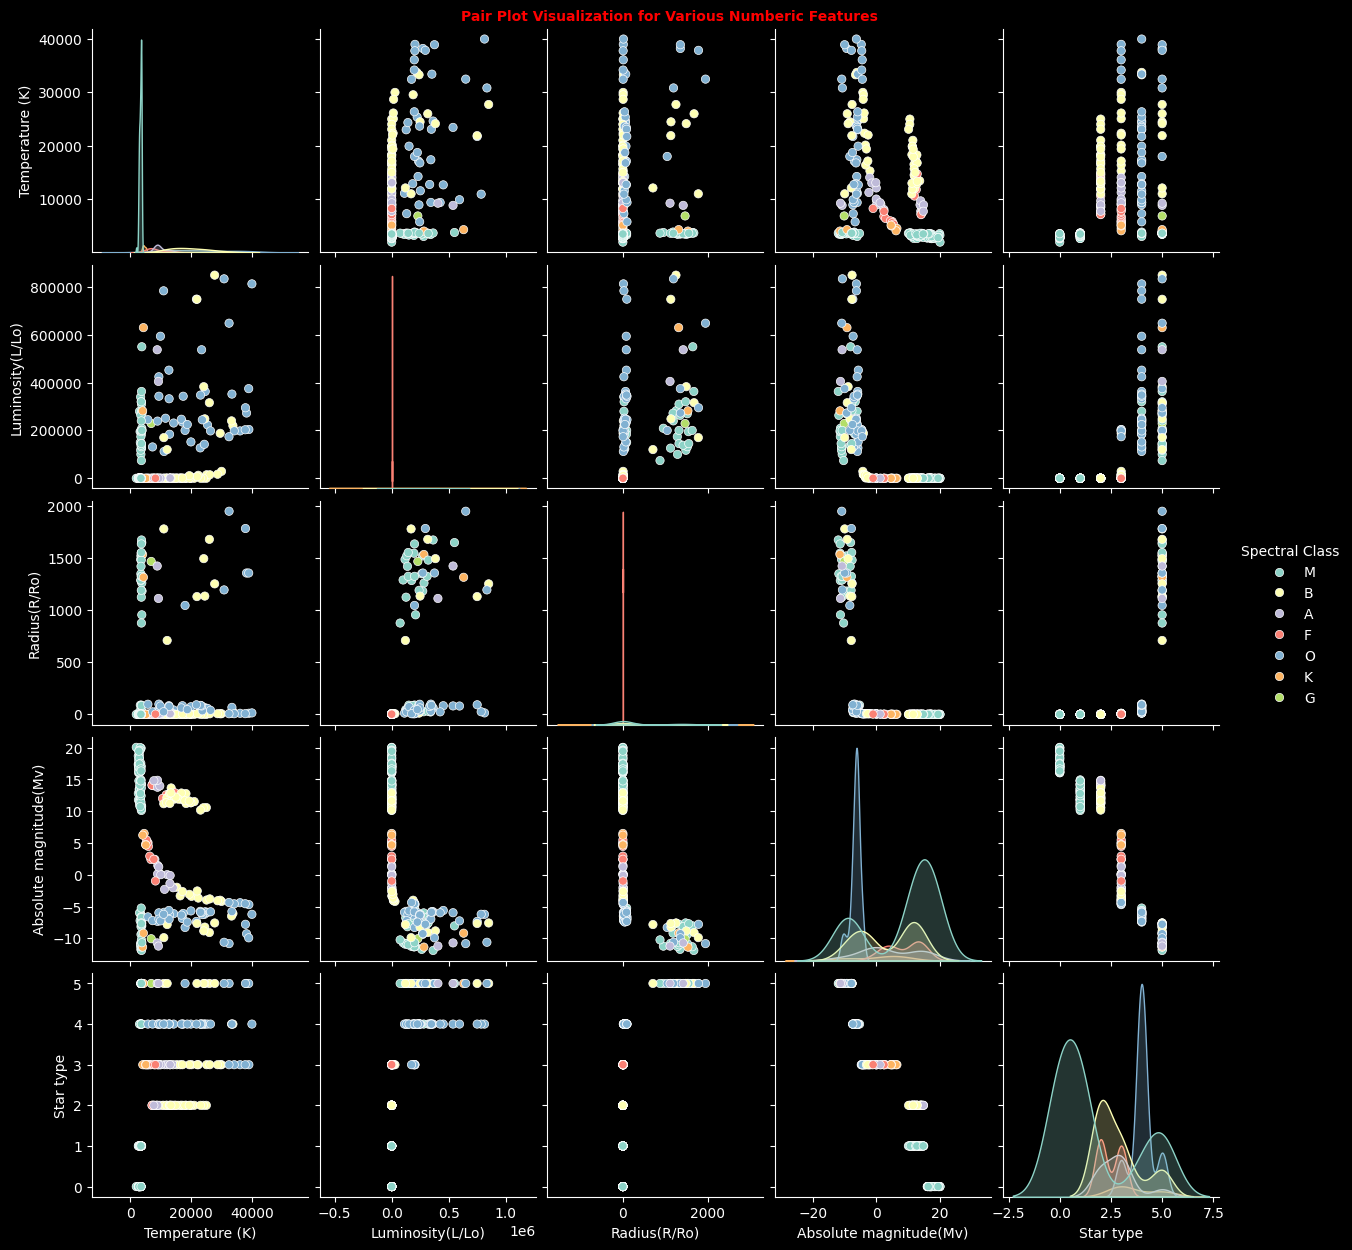

In [18]:
#Pair plot - scatter with hue
#hue - spectral class - col in the dataset. The hue of the graph will be decided on the values of the col
plt.style.use('dark_background')
g= sns.pairplot(main_df, hue = 'Spectral Class')
#way to add title to the pairplot - where y paramenter is the height float value - 1.05,1.08,1 etc
g.fig.suptitle('Pair Plot Visualization for Various Numberic Features', color = 'red', font = 'sans serif', fontsize = 10, weight = 'bold', y=1)
plt.savefig(base_dir + 'pairplot_1.jpg')
plt.show()

HR DIAGRAM - HERTZSPRUNG RUSSELL DIAGRAM
Create a scatter plot of HR Diagram

In [19]:
main_df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


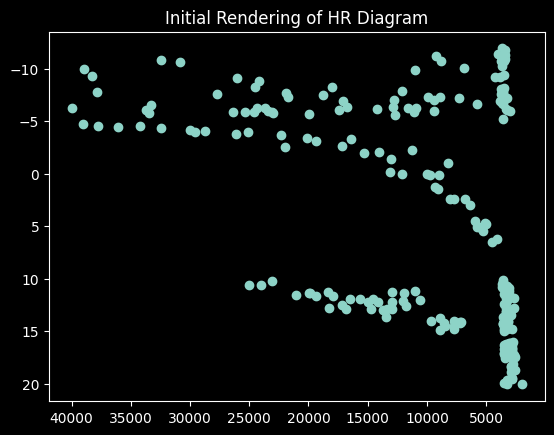

In [20]:
#Because the absolute magnitude and temperature of the stars are available - able to create hr diagram

#Plotting a HR Diagram for Temp vs Abs Mag
temperature = main_df['Temperature (K)'].values
abs_mag = main_df['Absolute magnitude(Mv)'].values

#In order to get the HR diagram, we need to invert the x and y axis
plt.scatter(temperature, abs_mag)
#gca -get current axis
plt.title("Initial Rendering of HR Diagram")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [21]:
#Creating dictionary
star_type = main_df['Star type'].values
temperature = main_df['Temperature (K)'].values
abs_mag = main_df['Absolute magnitude(Mv)'].values

#Dictionary within a dictionary
star_types = {
    0: {'label' : 'Brown Dwarf', 'color': 'brown', 'size' : 30 , 'marker': '.'},
    1: {'label' : 'Red Dwarf', 'color': 'red', 'size' : 35 , 'marker': '.'},
    2: {'label' : 'White Dwarf', 'color': 'white', 'size' : 40 , 'marker': '.'},
    3: {'label' : 'Main Sequence', 'color': 'cyan', 'size' : 30 , 'marker': 'o'},
    4: {'label' : 'Supergiants', 'color': 'orange', 'size' : 100 , 'marker': 'o'},
    5: {'label' : 'Hypergiants', 'color': 'maroon', 'size' : 150 , 'marker': 'o'},
}

Final HR Diagram

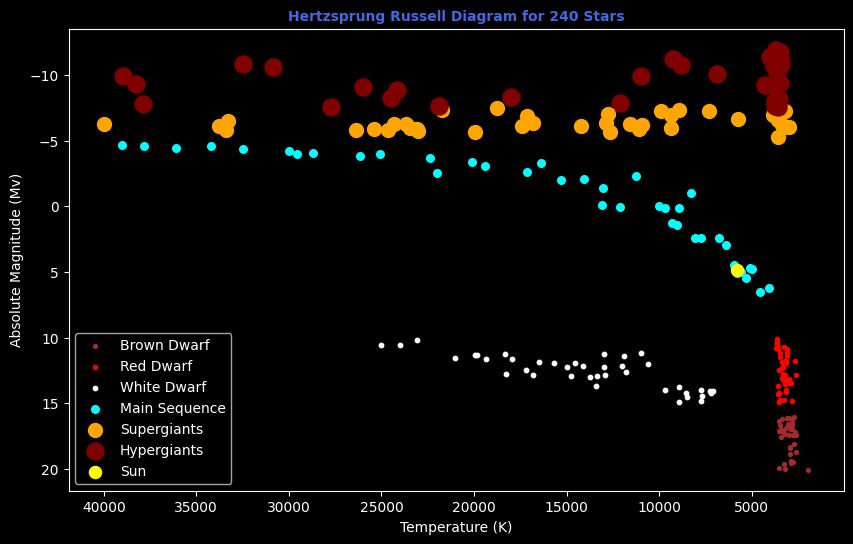

In [22]:
#for each row of the data set, the corresponding key value pair is taken from the dict. and the graph is plotted
plt.figure(figsize = (10,6))
axes = []
labels = set()
for i in range(len(star_type)):
  properties = star_types[star_type[i]]

  if properties['label'] not in labels:
      ax= plt.scatter(temperature[i], abs_mag[i],
                    s= properties['size'],
                    c=properties['color'],
                    marker= properties['marker'],
                    label = properties['label']
                    )
      axes.append(ax)
      labels.add(properties['label'])
  else:
      plt.scatter(temperature[i], abs_mag[i],
                    s= properties['size'],
                    c=properties['color'],
                    marker= properties['marker'],
                    label = properties['label']
                    )
#Adding data for Sun
ax_sun = plt.scatter(5778, 4.83, s=75, c='yellow', marker = 'o', label ='Sun')
axes.append(ax_sun)
labels.add("Sun")

plt.title(f"Hertzsprung Russell Diagram for {len(star_type)} Stars", fontsize = 12, font = 'sans serif', color = 'royalblue', weight = 'bold')
plt.xlabel("Temperature (K)", fontsize = 10, color = 'white')
plt.ylabel("Absolute Magnitude (Mv)", fontsize = 10, color ='white')

plt.legend(handles = axes)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.savefig(base_dir + 'HR_diagram.jpg')
plt.show()